## Correlations

Correlations measures the relationship between two variables. It shows how changes in one variable are associated with changes in
another. Examples If you study well chances of better mark is probable, cloud in sky determines whether you have to carry umbrella or not. Let's move forward in types of correlation based on Computation.
1. Pearson's Correlation 
2. Spearman's Rank Correlation(Non- Parameteric)
3. kendall's Tau Correlations(Non- Parameteric)

## Pearson's Correlation 

Pearson's correlation(r) measures the linear relationship between two continuous variables.It tells us
1. How strong the relationship is
2. whether the relationship is positive or negative

The coefficient r ranges from -1 to 1
1. +1 -> Perfect positive correlation(e.g. Studytime & exam score)
2. -1 -> Perfect negative correlation(e.g. Price of good & supply)
3. 0  -> No correlation( which gives random scatter plot)

lets try to implement using Titanic dataset

In [7]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


lets try on two Column 'Pclass' and 'Fare', lets examine how they are correlated to each other means if Plclass 1,2,3, increase does Fare also increase 
with ticket class. 

In [9]:
import scipy
from scipy.stats import pearsonr

#two variable
ticket_category=df['Pclass']
ticket_price=df['Fare']

#lets compute Pearsons correlation and p-values

r,p_value=pearsonr(ticket_category,ticket_price)

print(f"Pearson's correlation of two variable Pclass and Fare of titanic is: {r:.3f}")

print(f"p-values:{p_value:.3f}")


Pearson's correlation of two variable Pclass and Fare of titanic is: -0.549
p-values:0.000


## Observation

Negative sign indicates that two variable inverse relations. That is as class 1>2>3 , 1=top class, As a class decreases Fare of
ship also decreases. Minus 0.549(-0.3 to - 0.7 belongs to moderate negative) is moderate negative means variable Pclass and Fare are moderately Negatively correlated. To know Coefficuent Interpretation(weak,moderate,strong) you can goggle it.

Note: Where,
1. P_value tells us if a correlation is statistically significant.
2. if p_value < 0.05, we reject the null hypothesis(strong evidence of correlation)
3. if p_value > 0.05, the correlations might be random(not significant)

In [23]:
#we try to find variable correlation mathematically. Now lets try it graphically using Scatterplots

## ScatterPlots

A scatterplot is a fundamental data visualization tool that display the relationship between two numerical variables by representing each observation as a point on a 2D plate.
1. x-axis:Represent the independent/predictor variable.
2. y-axis:Represent the dependent/response variable.
3. Each point: One observation/records in the dataset.

Key Feature of Scatterplots:

1. Directions
   1. positive(upward trend)
   2. Negative(downward trend)
   3. No Clear direction

2. Strength
   1. Tight clustering indicates strong relationship
   2. Wide dispersion indicates weak relationship

3. Form
   1. Linear
   2. Curved
   3. Clustered
   4. No Pattern




4. Outliers
   1. points
   

### Pearson's Scatter Plots

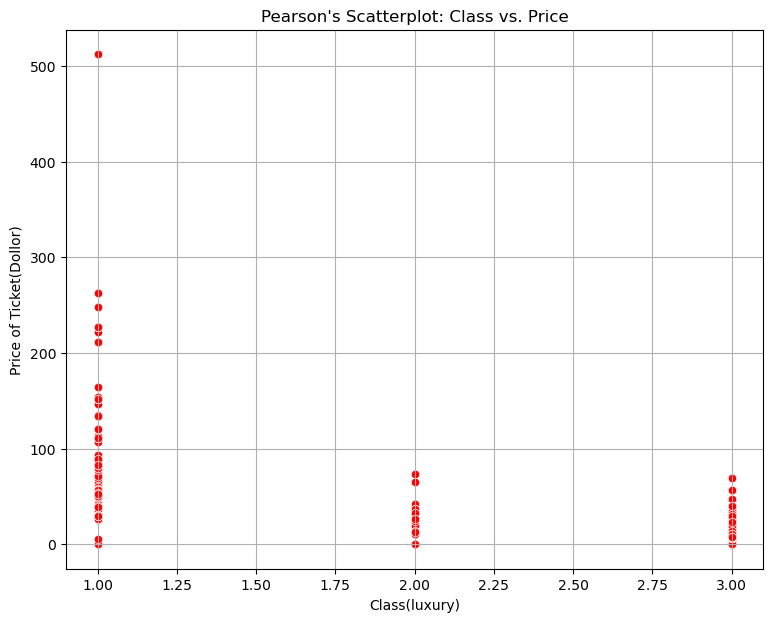

In [66]:

import matplotlib.pyplot as plt
import seaborn as sns

#scatter plot
plt.figure(figsize=(9,7))
sns.scatterplot(x=df['Pclass'],y=df['Fare'], color='red')

#labels and Title
plt.xlabel("Class(luxury)")
plt.ylabel("Price of Ticket(Dollor)")
plt.title("Pearson's Scatterplot: Class vs. Price")

#show grid
plt.grid(True)


plt.savefig("Pearson_Scatterplot_Class_vs_Price.png")
#show the plot
plt.show()

### Spearman's Rank Correlation(Non- Parameteric)

Spearman's correlation is used to measure the strength and direction of a monotonic relationship(as one variable increases, the other consistently increase or decrease) between two variables. Unlike Pearson's correlation(which measure linear relationship), spearman work with ordinal data.

In [18]:
#lets examine the relatiionship between Age and Survival rates , how they act? chances of surival is directly dependent on age of passenger  or not

import scipy.stats as stats

age=df['Age']

survived=df['Survived']

#compute Spearson's correlations

spearman_corr,p_value=stats.spearmanr(age,survived)

print(f"Spearson's correlations coeffiicient:{spearman_corr:.3f}")

print(f"P_value:{p_value:.3f}")

Spearson's correlations coeffiicient:nan
P_value:nan


In [20]:
#output is nan , lets check if columns consist a nan value

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#so Age consist 177 nan value , lets handle them

df['Age'].fillna(0,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#nan value of column is handled, lets calculate spearson again
age=df['Age']

survived=df['Survived']

#compute Spearson's correlations

spearman_corr,p_value=stats.spearmanr(age,survived)

print(f"Spearson's correlations coeffiicient:{spearman_corr:.3f}")

print(f"P_value:{p_value:.3f}")


Spearson's correlations coeffiicient:0.030
P_value:0.375


## Oservations 

Correlation Coefficient = 0.030
The value is very close to 0, indicating an extremely weak monotonic relationship between age and survival.
Direction: Slightly positive, meaning older passengers had a tiny tendency to survive more, but this is negligible.
The p-value is > 0.05 (common significance threshold), meaning we fail to reject the null hypothesis.

Conclusion: There is no statistically significant correlation between age and survival in this dataset

### scatterplot

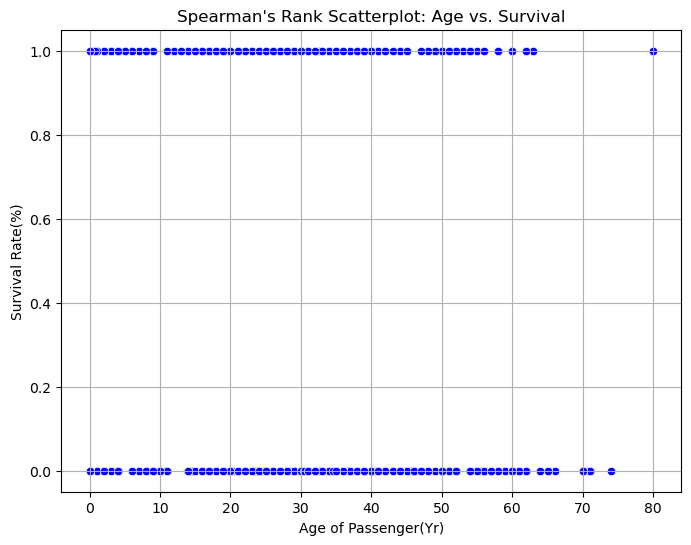

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=age, y=survived, color='blue')

# Labels and Title
plt.xlabel("Age of Passenger(Yr)")
plt.ylabel("Survival Rate(%)")
plt.title("Spearman's Rank Scatterplot: Age vs. Survival")

# Show grid
plt.grid(True)

plt.savefig("Spearman_Rank_Scatterplot_Age_vs_Survival.png")

# Show the plot
plt.show()

### Kendall's Tau Correlation(Non-Parametric)

Kendal Tau(r) is a non-parametric measure of correlation that evaluate the strengh of the relationship between two ranked variable. It is similar to Spearman's Rank Correlation but is often more reliable for smaller datasets and handle tied ranks better.

In [38]:
#lets try to find this correlation on Sex and Survived

#But Sex Column is categorical, lets try to encode with pandas map()



import pandas as pd

df['encoded_sex']=df['Sex'].map({'male':0,'female':1})

df['encoded_sex']


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: encoded_sex, Length: 891, dtype: int64

In [40]:
#lets examine this data in Kendall's Tau coefficient

tau,p_value=stats.kendalltau(df['encoded_sex'],df['Survived'])

print(f"Kendall Tau coefficient is:{tau:.3f}")

print(f"p_value is :{p_value:.3f}")

Kendall Tau coefficient is:0.543
p_value is :0.000


### Observation 

Women (encoded_sex=1) were significantly more likely to survive than men (encoded_sex=0).This aligns with the historical "women and children first" policy on the Titanic.p-value < 0.05: Reject the null hypothesis (no association).

Conclusion: The correlation between sex and survival is statistically significant.
Note: A p-value of 0.000 means the result is extremely unlikely under the null hypothesis.

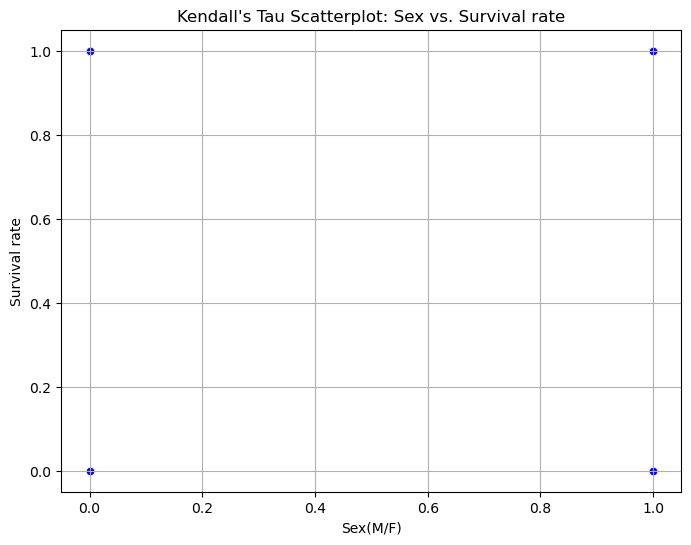

In [72]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['encoded_sex'], y=df['Survived'], color='blue')

# Labels and Title
plt.xlabel("Sex(M/F)")
plt.ylabel("Survival rate")
plt.title("Kendall's Tau Scatterplot: Sex vs. Survival rate")

# Show grid
plt.grid(True)


plt.savefig("Kendall_Tau_Scatterplot_Sex_vs_Survival_rate.png")

# Show the plot
plt.show()
